In [44]:
import os
import pandas as pd

In [45]:
ROOT_DIR = os.path.realpath(os.path.join(os.getcwd(), '..'))
cln_pkl_loc = os.path.join(ROOT_DIR, 'data_cleaning','cleanweathersmall.pkl')

In [46]:
df = pd.read_pickle(cln_pkl_loc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765246 entries, 0 to 3765245
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   station  object        
 1   time     datetime64[ns]
 2   temp     float64       
 3   dwpt     float64       
 4   rhum     float64       
 5   prcp     float64       
 6   wdir     float64       
 7   wspd     float64       
 8   pres     float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 258.5+ MB


In [47]:
pivoted_df = df.pivot(index='time', columns='station', values=['temp', 'dwpt','rhum','prcp','wdir','wspd','pres'])
pivoted_df.columns = ['_'.join(col) for col in pivoted_df.columns.values]
pivoted_df

,temp_0CNUO,temp_0CO7B,temp_0FV1F,temp_1J1PJ,temp_1JWST,temp_20QWH,temp_21O3U,temp_2W8UZ,temp_3S56J,temp_4DUJO,...,pres_W5F5F,pres_X9FED,pres_XM44W,pres_Y59TE,pres_Z7ZOG,pres_ZFZUV,pres_ZNWZW,pres_ZUQJS,pres_ZWC6W,pres_ZYITU
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,-25.10,5.00,1.20,-0.90,-6.50,-28.70,-29.00,4.60,-26.50,1.80,...,NaN,NaN,1013.50,NaN,NaN,1023.80,NaN,NaN,1010.80,NaN
2022-01-01 01:00:00,-25.70,5.10,0.90,-0.60,-7.50,-29.50,-28.90,4.60,-27.30,1.60,...,NaN,NaN,1014.60,NaN,NaN,1024.20,NaN,NaN,1011.80,NaN
2022-01-01 02:00:00,-26.20,4.20,1.50,-0.80,-8.60,-30.20,-30.10,4.70,-27.90,0.90,...,NaN,NaN,1015.10,NaN,NaN,1024.90,NaN,NaN,1012.70,NaN
2022-01-01 03:00:00,-26.10,5.50,4.10,-0.90,-9.40,-29.90,-30.10,4.60,-28.10,1.00,...,NaN,NaN,1016.00,NaN,NaN,1025.40,NaN,NaN,1013.60,NaN
2022-01-01 04:00:00,-26.50,5.90,3.10,-1.20,-10.10,-30.40,-31.40,4.90,-28.60,0.50,...,NaN,NaN,1017.30,NaN,NaN,1025.40,NaN,NaN,1013.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-22 19:00:00,12.40,17.80,13.70,11.50,10.20,13.50,12.50,15.20,10.80,12.40,...,1022.10,1025.20,1022.60,1025.00,1025.30,1024.50,1025.40,1022.60,1017.80,1016.70
2022-09-22 20:00:00,13.00,17.00,14.30,12.00,10.40,14.00,12.50,14.80,11.40,11.60,...,1020.30,1024.40,1022.40,1024.00,1024.00,1023.10,1025.00,1022.20,1017.90,1016.00
2022-09-22 21:00:00,13.20,16.60,13.90,12.40,10.50,14.30,12.40,15.10,11.70,10.80,...,1019.60,1024.20,1022.20,1023.00,1023.70,1022.00,1024.00,1022.40,1018.10,1017.40


### Our target is Ann Arbor which is station KARB0. This simple model will just try to predict the temperature for KARB0. So will build some features specifically around it.

In [48]:
ann_arbor_cols = [col for col in pivoted_df.columns if "KARB0" in col]
ann_arbor_df = pivoted_df[ann_arbor_cols].copy()

#### This adds a columnn for the weather at 24 hrs prior to our target

In [49]:
for col in ann_arbor_df.columns:
    ann_arbor_df[f'24 hr~{col}'] = ann_arbor_df[col].shift(-24)

In [50]:
ann_arbor_df = ann_arbor_df.rename_axis(None, axis = 0)
ann_arbor_df = ann_arbor_df[ann_arbor_df['24 hr~temp_KARB0'].notna()]
ann_arbor_df

,temp_KARB0,dwpt_KARB0,rhum_KARB0,prcp_KARB0,wdir_KARB0,wspd_KARB0,pres_KARB0,24 hr~temp_KARB0,24 hr~dwpt_KARB0,24 hr~rhum_KARB0,24 hr~prcp_KARB0,24 hr~wdir_KARB0,24 hr~wspd_KARB0,24 hr~pres_KARB0
2022-01-01 00:00:00,5.00,2.90,86.00,0.00,120.00,11.00,1005.00,-2.20,-3.90,88.00,0.60,50.00,16.60,1010.00
2022-01-01 01:00:00,5.00,2.90,86.00,0.00,120.00,11.20,1005.40,-2.80,-5.60,81.00,0.70,30.00,16.60,1010.20
2022-01-01 02:00:00,5.00,2.90,86.00,0.00,120.00,5.40,1005.30,-3.30,-5.60,84.00,0.40,30.00,24.10,1009.90
2022-01-01 03:00:00,5.00,2.90,86.00,0.00,0.00,0.00,1004.90,-3.90,-6.10,85.00,0.30,20.00,18.40,1010.30
2022-01-01 04:00:00,5.60,3.30,85.00,0.00,0.00,0.00,1004.90,-4.40,-6.10,88.00,0.30,30.00,16.60,1010.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-21 19:00:00,29.40,20.60,59.00,0.00,290.00,22.30,1007.30,15.00,3.50,46.00,0.00,320.00,25.90,1017.60
2022-09-21 20:00:00,28.30,20.10,61.00,0.00,260.00,18.40,1007.00,16.10,4.50,46.00,0.00,320.00,18.40,1017.90
2022-09-21 21:00:00,27.80,19.30,60.00,0.00,280.00,18.40,1007.40,16.00,4.40,46.00,0.00,330.00,22.00,1019.00
2022-09-21 22:00:00,26.70,18.80,62.00,0.00,250.00,16.60,1007.40,14.00,2.90,47.00,0.00,330.00,22.00,1019.00


### Now our target will be the '-24hr~temp_KARB0' column, which is the temperature 24 hrs in the future from all of the original features.

In [51]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model
from sklearn.dummy import DummyRegressor
X_cols = [col for col in ann_arbor_df.columns if "~" not in col]
X = ann_arbor_df[X_cols]
y = ann_arbor_df['24 hr~temp_KARB0']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
xt_reg = ExtraTreesRegressor(n_estimators=100, random_state=696,n_jobs=-1,).fit(X_train, y_train)
lasso_reg = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
tw_reg = linear_model.TweedieRegressor().fit(X_train, y_train)
dummy_reg = DummyRegressor(strategy="mean").fit(X_train, y_train)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [52]:
print(f"Extra Trees Regressor acc score: {xt_reg.score(X_test,y_test)}")
print(f"      Lasso Regressor acc score: {lasso_reg.score(X_test,y_test)}")
print(f"    Tweedie Regressor acc score: {tw_reg.score(X_test,y_test)}")
print(f"      Dummy Regressor acc score: {dummy_reg.score(X_test,y_test)}")

Extra Trees Regressor acc score: 0.9328335846236752
      Lasso Regressor acc score: 0.85775280459372
    Tweedie Regressor acc score: 0.8461027179788403
      Dummy Regressor acc score: -0.0010437921892019197


In [53]:
feature_importance_df = pd.DataFrame([X.columns, xt_reg.feature_importances_]).transpose()
feature_importance_df.columns = ['Feature', 'Importance']
feature_importance_df

,Feature,Importance
0,temp_KARB0,0.47
1,dwpt_KARB0,0.38
2,rhum_KARB0,0.04
3,prcp_KARB0,0.01
4,wdir_KARB0,0.03
5,wspd_KARB0,0.02
6,pres_KARB0,0.04


In [54]:
import altair as alt
alt.Chart(feature_importance_df).mark_bar().encode(
    x=alt.X('Importance:Q', axis=alt.Axis(format="%", tickSize=0, labelFontSize=12)),
    y=alt.Y(
        'Feature:N', sort=list(feature_importance_df.Feature), title="",
        axis=alt.Axis(tickSize=0, labelFontSize=12, labelPadding=10)),
).properties(
    height=200
)



alt.Chart(...)

In [55]:
from sklearn.model_selection import cross_val_score
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import numpy as np

space  = [Integer(100,150, name='n_estimators'),
          Integer(1, 5, name='max_depth'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    xt_reg.set_params(**params)

    return -np.mean(cross_val_score(xt_reg, X, y, cv=5, n_jobs=-1,
                    scoring='neg_mean_squared_error'))

In [56]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=696)

"Best score=%.4f" % res_gp.fun

'Best score=27.7830'

In [57]:
print("""Best parameters:
- n-estimators=%d
- max_depth=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2],res_gp.x[3]))

Best parameters:
- n-estimators=150
- max_depth=5
- min_samples_split=2
- min_samples_leaf=6


<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

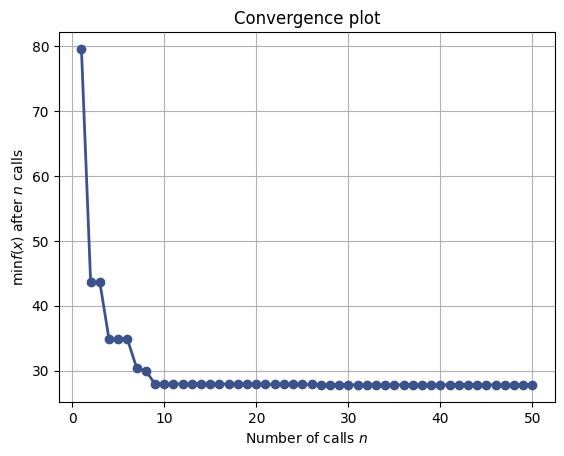

In [58]:
from skopt.plots import plot_convergence

plot_convergence(res_gp)

## Same model, with larger historical AA dataset with additional features for means

In [59]:
ROOT_DIR = os.path.realpath(os.path.join(os.getcwd(), '..'))
aa_pkl_loc = os.path.join(ROOT_DIR, 'data','data','aa_historical.pkl')
df = pd.read_pickle(aa_pkl_loc)
df.columns

Index(['temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun', 'coco', 'Year', 'DayOfYear', 'Hour', 'HourOfYear', 'ATAhr-temp',
       'ATAhr-dwpt', 'ATAhr-rhum', 'ATAhr-prcp', 'ATAhr-wdir_x', 'ATAhr-wspd',
       'ATAhr-pres', 'L5Ahr-temp', 'L5Ahr-dwpt', 'L5Ahr-rhum', 'L5Ahr-prcp',
       'ATAhr-wdir_y', 'L5Ahr-wspd', 'L5Ahr-pres', 'ATAday-temp',
       'ATAday-dwpt', 'ATAday-rhum', 'ATAday-prcp', 'ATAday-wdir',
       'ATAday-wspd', 'ATAday-pres', 'L5Aday-temp', 'L5Aday-dwpt',
       'L5Aday-rhum', 'L5Aday-prcp', 'L5Aday-wdir', 'L5Aday-wspd',
       'L5Aday-pres'],
      dtype='object')

In [60]:
df.drop(columns=['snow', 'wpgt','tsun','coco','Year'],inplace=True)
cols = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
for col in cols:
    try:
        df[col].fillna(df[f'ATAhr-{col}'],inplace=True)
    except:
        df[col].fillna(df[f'ATAhr-{col}_x'],inplace=True)
    df[f'24 hr~{col}'] = df[col].shift(-24)
df = df[df['24 hr~temp'].notna()]

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146306 entries, 2006-01-01 00:00:00 to 2022-10-01 00:00:00
Data columns (total 45 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   temp          146306 non-null  float64
 1   dwpt          146306 non-null  float64
 2   rhum          146306 non-null  float64
 3   prcp          146306 non-null  float64
 4   wdir          146306 non-null  float64
 5   wspd          146306 non-null  float64
 6   pres          146306 non-null  float64
 7   DayOfYear     146306 non-null  float64
 8   Hour          146306 non-null  int64  
 9   HourOfYear    146306 non-null  float64
 10  ATAhr-temp    146306 non-null  float64
 11  ATAhr-dwpt    146306 non-null  float64
 12  ATAhr-rhum    146306 non-null  float64
 13  ATAhr-prcp    146306 non-null  float64
 14  ATAhr-wdir_x  146306 non-null  float64
 15  ATAhr-wspd    146306 non-null  float64
 16  ATAhr-pres    146306 non-null  float64
 17  L5Ahr-temp    

In [61]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X_cols = [col for col in df.columns if "~" not in col]
X = df[X_cols]
y = df['24 hr~temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
xt_reg = ExtraTreesRegressor(n_estimators=100, random_state=696,n_jobs=-1,).fit(X_train, y_train)
lasso_reg = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
tw_reg = linear_model.TweedieRegressor().fit(X_train, y_train)
dummy_reg = DummyRegressor(strategy="mean").fit(X_train, y_train)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [62]:
print(f"Extra Trees Regressor acc score: {xt_reg.score(X_test,y_test)}")
print(f"      Lasso Regressor acc score: {lasso_reg.score(X_test,y_test)}")
print(f"    Tweedie Regressor acc score: {tw_reg.score(X_test,y_test)}")
print(f"      Dummy Regressor acc score: {dummy_reg.score(X_test,y_test)}")


Extra Trees Regressor acc score: 0.9462778798555658
      Lasso Regressor acc score: 0.872980683371312
    Tweedie Regressor acc score: 0.8644517767355118
      Dummy Regressor acc score: -2.5105755165899524e-06


In [130]:
from sklearn.model_selection import cross_val_score
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
X_cols = [col for col in df.columns if "~" not in col]
X = df[X_cols]
y = df['24 hr~temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=696)
xt_reg = ExtraTreesRegressor(n_estimators=100, random_state=696,n_jobs=-1,)
lasso_reg = linear_model.Lasso(alpha=0.1)
tw_reg = linear_model.TweedieRegressor()
dummy_reg = DummyRegressor(strategy="mean")
models = {'extra trees regressor':xt_reg,
          'lasso':lasso_reg,
          'twindle':tw_reg,
          'dummy':dummy_reg}
for key, value in models.items():
#     all_accuracies = cross_val_score(estimator=value, X=X_train, y=y_train, cv=5,n_jobs=-1,scoring)
    cv_results = cross_validate(value, X, y, cv=5,n_jobs=-1)
    print(key)
    print("Mean accuracy score: ", end="")
    print(round(cv_results['test_score'].mean(),3), end="")
    print(", best accuracy score: ", end="")
    print(round(cv_results['test_score'].max(),3), end="")
    print(", with std dev of: ", end="")
    print(round(cv_results['test_score'].std(),3))
    print("Mean training time: ", end="")
    print("**************")
#     print(f'The {key} model achieved a mean accuracy score of: {all_accuracies.mean()} with a std of: {all_accuracies.std()} and a high of {all_accuracies.max()}')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


extra trees regressor
Mean accuracy score: 0.863, best accuracy score: 0.873, with std dev of: 0.006
Mean training time: **************
lasso
Mean accuracy score: 0.869, best accuracy score: 0.88, with std dev of: 0.007
Mean training time: **************
twindle
Mean accuracy score: 0.86, best accuracy score: 0.871, with std dev of: 0.008
Mean training time: **************
dummy
Mean accuracy score: -0.017, best accuracy score: -0.001, with std dev of: 0.009
Mean training time: **************


In [63]:
feature_importance_df = pd.DataFrame([X.columns, xt_reg.feature_importances_]).transpose()
feature_importance_df.columns = ['Feature', 'Importance']
feature_importance_df.sort_values('Importance',ascending=False,inplace=True)
feature_importance_df

,Feature,Importance
10,ATAhr-temp,0.25
0,temp,0.19
17,L5Ahr-temp,0.11
24,ATAday-temp,0.09
31,L5Aday-temp,0.05
11,ATAhr-dwpt,0.04
32,L5Aday-dwpt,0.04
1,dwpt,0.04
25,ATAday-dwpt,0.03
18,L5Ahr-dwpt,0.03


In [85]:
import altair as alt
alt.Chart(feature_importance_df[:5]).mark_bar().encode(
    x=alt.X('Importance:Q', axis=alt.Axis(format="%", tickSize=0, labelFontSize=12)),
    y=alt.Y(
        'Feature:N', sort=list(feature_importance_df[:5].Feature), title="",
        axis=alt.Axis(tickSize=0, labelFontSize=12, labelPadding=10)),
).properties(
    height=200
)

alt.Chart(...)

In [67]:
from sklearn.model_selection import cross_val_score
from skopt.space import Integer
from skopt.utils import use_named_args
import numpy as np

space  = [Integer(100,150, name='n_estimators'),
          Integer(1, 5, name='max_depth'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    xt_reg.set_params(**params)

    return -np.mean(cross_val_score(xt_reg, X, y, cv=5, n_jobs=-1,
                    scoring='neg_mean_squared_error'))

In [68]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=30, random_state=696)

"Best score=%.4f" % res_gp.fun

'Best score=19.0073'

In [69]:
print("""Best parameters:
- n-estimators=%d
- max_depth=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2],res_gp.x[3]))

Best parameters:
- n-estimators=100
- max_depth=5
- min_samples_split=100
- min_samples_leaf=100


In [122]:
pred_df = pd.DataFrame()
pred_df['Actual'] = y.values
pred_df['XT-pred'] = xt_reg.predict(X)
# pred_df['Lo-pred'] = lasso_reg.predict(X)
# pred_df['Tw-pred'] = tw_reg.predict(X)
# pred_df['Dum-pred'] = dummy_reg.predict(X)
pred_df['TimeStamp'] = df.index
pred_df = pred_df.melt(id_vars='TimeStamp')
pred_df = pred_df[pred_df['TimeStamp'].dt.year == 2022]
pred_df = pred_df[pred_df['TimeStamp'].dt.month == 8]

In [126]:
alt.data_transformers.disable_max_rows()
alt.Chart(pred_df).mark_line().encode(
    x=alt.X('TimeStamp:T', axis=alt.Axis(tickSize=0, labelFontSize=12)),
    y=alt.Y('value:Q'),
    color='variable',
    strokeDash='variable'
).properties(
    height=200,
    width=800
)

alt.Chart(...)